In [23]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [24]:
encoder = Model(input_img, encoded)

In [25]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [26]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [27]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [30]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                #epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.3616 - val_loss: 0.2711
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2640 - val_loss: 0.2527
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2423 - val_loss: 0.2297
Epoch 4/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2228 - val_loss: 0.2134
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2086 - val_loss: 0.2014
Epoch 6/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1982 - val_loss: 0.1923
Epoch 7/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1901 - val_loss: 0.1850
Epoch 8/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1833 - val_loss: 0.1787
Epoch 9/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1772 - val_loss: 0.1730
Epoch

In [31]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
same_imgs = autoencoder.predict(x_test)

In [10]:
def show_all(imgs):

    # use Matplotlib (don't ask)
    import matplotlib.pyplot as plt

    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

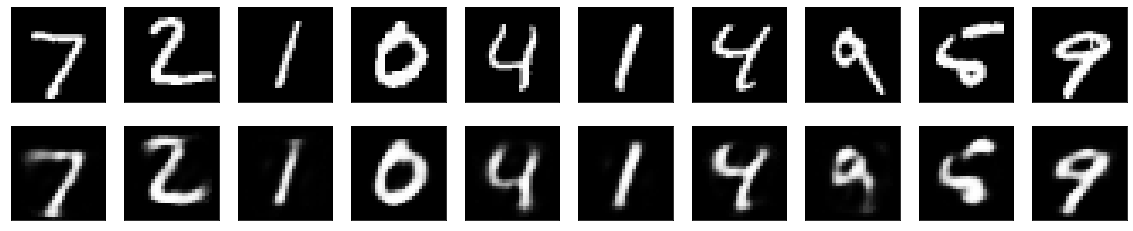

In [59]:
show_all(decoded_imgs)

### Deep autoencoder

In [60]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

#### 1 epoch

In [61]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2s 38us/step - loss: 0.3461 - val_loss: 0.2649


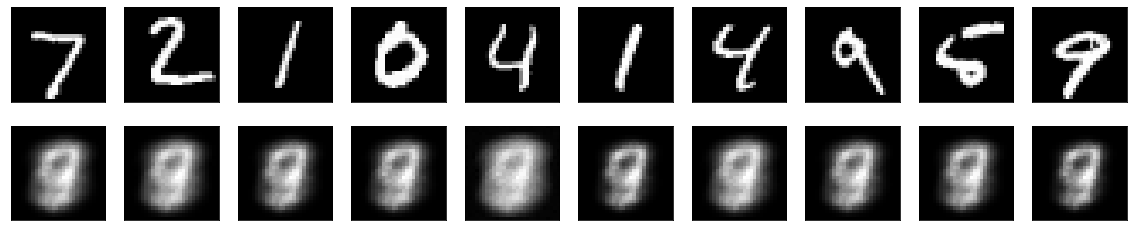

In [62]:
show_all(autoencoder.predict(x_test))

#### 10 epochs

In [63]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.2588 - val_loss: 0.2550
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.2455 - val_loss: 0.2341
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.2288 - val_loss: 0.2234
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.2185 - val_loss: 0.2115
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.2064 - val_loss: 0.2001
Epoch 6/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1950 - val_loss: 0.1887
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1849 - val_loss: 0.1781
Epoch 8/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1772 - val_loss: 0.1754
Epoch 9/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1714 - val_loss: 0.1662
Epoch

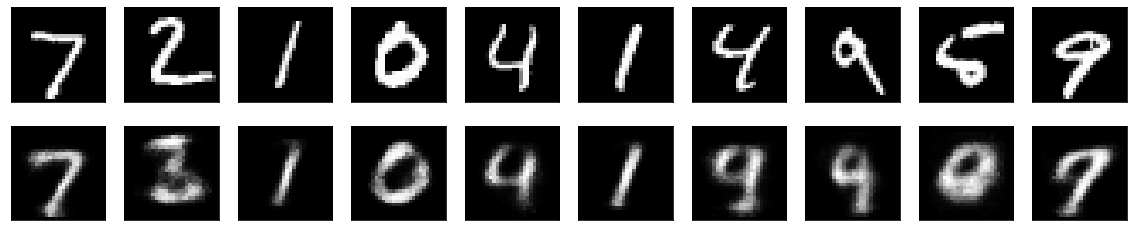

In [65]:
show_all(autoencoder.predict(x_test))

#### 100 epochs

In [16]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.1581 - val_loss: 0.1536
Epoch 2/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1549 - val_loss: 0.1510
Epoch 3/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1521 - val_loss: 0.1503
Epoch 4/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1493 - val_loss: 0.1470
Epoch 5/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1471 - val_loss: 0.1466
Epoch 6/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1449 - val_loss: 0.1426
Epoch 7/100
60000/60000 [==============================] - 2s 29us/step - loss: 0.1431 - val_loss: 0.1444
Epoch 8/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1411 - val_loss: 0.1404
Epoch 9/100
60000/60000 [==============================] - 2s 30us/step - loss: 0.1395 - val_loss: 0.1

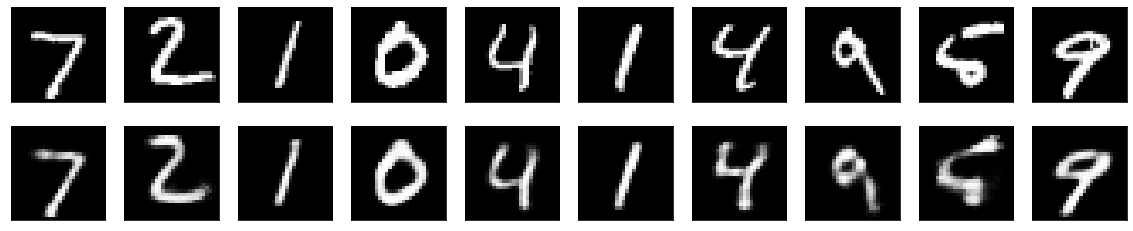

In [17]:
show_all(autoencoder.predict(x_test))

## Convolutional autoencoder

In [66]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [76]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [77]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [78]:
from keras.callbacks import TensorBoard

In [79]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/cluster/scratch/akozharin/tmp/')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 486us/step - loss: 0.2198 - val_loss: 0.1679
Epoch 2/10
60000/60000 [==============================] - 29s 481us/step - loss: 0.1573 - val_loss: 0.1485
Epoch 3/10
60000/60000 [==============================] - 29s 482us/step - loss: 0.1416 - val_loss: 0.1389
Epoch 4/10
60000/60000 [==============================] - 29s 482us/step - loss: 0.1343 - val_loss: 0.1267
Epoch 5/10
60000/60000 [==============================] - 29s 484us/step - loss: 0.1298 - val_loss: 0.1262
Epoch 6/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.1265 - val_loss: 0.1296
Epoch 7/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.1237 - val_loss: 0.1272
Epoch 8/10
60000/60000 [==============================] - 29s 483us/step - loss: 0.1216 - val_loss: 0.1182
Epoch 9/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.1198 - val_

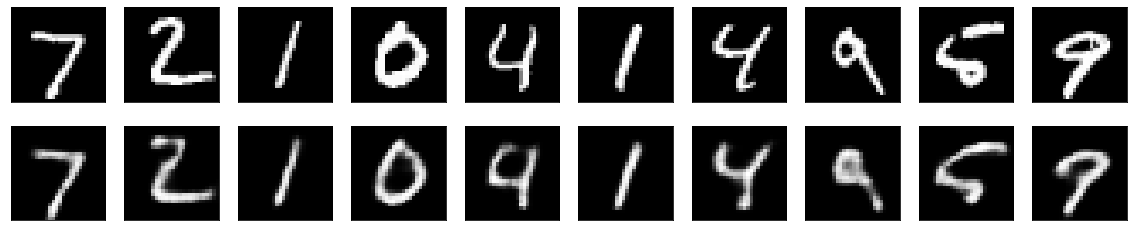

In [81]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Denoising problem

In [82]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

from keras.callbacks import TensorBoard

In [83]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

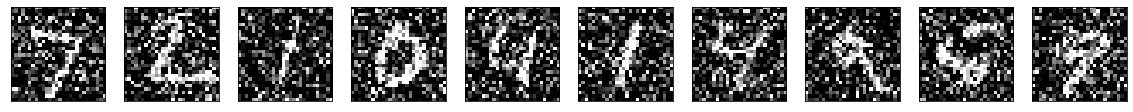

In [84]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [85]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [86]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/cluster/scratch/akozharin/tmp/', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 58s 963us/step - loss: 0.1757 - val_loss: 0.1245
Epoch 2/10
60000/60000 [==============================] - 57s 957us/step - loss: 0.1223 - val_loss: 0.1129
Epoch 3/10
60000/60000 [==============================] - 59s 980us/step - loss: 0.1147 - val_loss: 0.1142
Epoch 4/10
60000/60000 [==============================] - 58s 971us/step - loss: 0.1111 - val_loss: 0.1114
Epoch 5/10
60000/60000 [==============================] - 58s 969us/step - loss: 0.1090 - val_loss: 0.1105
Epoch 6/10
60000/60000 [==============================] - 58s 968us/step - loss: 0.1083 - val_loss: 0.1065
Epoch 7/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1069 - val_loss: 0.1098
Epoch 8/10
60000/60000 [==============================] - 58s 971us/step - loss: 0.1057 - val_loss: 0.1057
Epoch 9/10
60000/60000 [==============================] - 58s 967us/step - loss: 0.1069 - val_lo

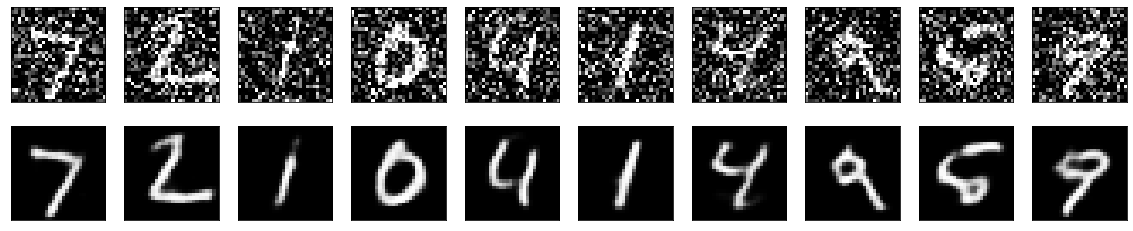

In [88]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## ResNet autoencoder

In [89]:
from keras import applications

In [90]:
base_model = applications.resnet50.ResNet50(
    weights= None, include_top=False, input_shape= (img_height,img_width,3)
)

NameError: name 'img_height' is not defined